## Read data

In [1]:
from os import listdir

In [2]:
comments_batch = []
for file_name in listdir('comments'):
    with open('comments/'+file_name, 'r') as f:
        comments_batch.append(eval(f.read()))

## Change data structure

In [3]:
from unidecode import unidecode

In [4]:
with open('polish.stopwords.txt', 'r') as f:
    stop_words = f.read().split('\n')

In [5]:
comments_batch[1]['row']['comments']['comments']

[{'main_comment': {'id': '100545330',
   'author': 'bwn104',
   'date': '14.05.2018, 17:00',
   'body': 'Kilka uwag: 1. Kataloński kryzys ma charakter polityczny i w sposób polityczny powinien być załatwiany. Nie przez aresztowania, więzienia, zastraszanie i doprowadzanie do emigracji katalońskiej elity politycznej, bo to hańba i wstyd nie tylko dla hiszpańskiej demokracji ale dla całej europejskiej wspólnoty, której przecież Hiszpania jest ważnym elementem. 2. Polityczny kompromis jest możliwy. Katalończycy prowadzą swą walkę o niepodległość w sposób pokojowy. Być może tym kompromisem byłaby szersza autonomia regionu. Niczego dobrego nie będzie jednak z kompromisu gdy madrycki rząd będzie tę autonomię ograniczać. Bo przecież jak pisze wyraźnie uprzedzony do idei samostanowienia Katalonii red.Stasiński „rząd w Madrycie obiecał, iż zajmie się instytucjami samorządowymi w Katalonii, które w ostatnich latach stały się narzędziem strategii separatystów – tzn. mediami publicznymi i szkolnic

In [6]:
all_comments = []
for j in comments_batch:
    url = j['row']['comments']['url']
    for main_comment in j['row']['comments']['comments']:
        comment = {
            "url": url,
            "id": main_comment['main_comment']['id'],
            "date": main_comment['main_comment']['date'],
            "author": main_comment['main_comment']['author'],
            "susp" : False,
            "type" : 'main',
            "upvotes": main_comment['main_comment']['upvotes'],
            "downvotes": main_comment['main_comment']['downvotes'],
            "replies": len(main_comment['sub_comments']),
            "length": len(main_comment['main_comment']['body']),
            "words": [],
        }
        
        words = []
        for word in main_comment['main_comment']['body'].split(' '):
            word = word.lower()
            if word not in stop_words:
                comment["words"].append(unidecode(word))
        if len(comment["words"]) != 0:
            comment["susp"] = main_comment['main_comment']["suspicious"]
            all_comments.append(comment)

        for i, sub_comment in enumerate(main_comment['sub_comments']):
            comment = {
            "url": url,
                "id": sub_comment['id'],
                "date": sub_comment['date'],
                "author": sub_comment['author'],
                "susp" : False,
                "type" : 'sub',
                "upvotes": sub_comment['upvotes'],
                "downvotes": sub_comment['downvotes'],
                "replies": len(main_comment['sub_comments']) - i - 1,
                "length": len(sub_comment['body']),
                "words": [],
            }
            
            for word in sub_comment['body'].split(' '):
                word = word.lower()
                if word not in stop_words:
                    comment["words"].append(unidecode(word))
            if len(comment["words"]) != 0:
                comment["susp"] = sub_comment["suspicious"]
                all_comments.append(comment)
                
        

## Calculate average sentence lenght

In [7]:
sentence_lengths = []
for comment in all_comments:
    for sentence in " ".join(comment["words"]).split('.'):
        sentence_lengths.append(len(sentence.split(' ')))

In [8]:
avg_sentence_lenght = round(sum(sentence_lengths) / len(sentence_lengths), 2)

In [9]:
# How many times the second layer should be smaller then first one
avg_sentence_lenght

5.33

## Calculate average number of sentences in comment

In [10]:
comments_sentences_count = []
for comment in all_comments:
    comments_sentences_count.append(len(" ".join(comment["words"])[:-1].split('.')))

In [11]:
avg_sentencte_count = round(sum(comments_sentences_count) / len(comments_sentences_count), 2)

In [12]:
# How many times the third layer should be smaller
avg_sentencte_count

2.73

### Remove special characters

In [13]:
from re import sub

In [14]:
comments = []
for comment in all_comments:
    tmp_comment = comment.copy()
    tmp_comment["words"] = [sub(r"[^a-z]", "", x) for x in comment["words"] if sub(r"[^a-z]", "", x) != '']
    comments.append(tmp_comment)

In [15]:
comments[0]

{'url': 'http://wyborcza.biz/biznes/7,147880,23632593,nik-alarmuje-polacy-maja-zanizone-emerytury.html',
 'id': '100663009',
 'date': '05.07.2018, 09:24',
 'author': 'ZS54',
 'susp': False,
 'type': 'main',
 'upvotes': '10',
 'downvotes': '0',
 'replies': 0,
 'length': 448,
 'words': ['brak',
  'kwartalnych',
  'waloryzacji',
  'kapitalu',
  'powodu',
  'zastosowania',
  'zus',
  'czerwcowych',
  'emerytur',
  'wynikajacego',
  'ustawy',
  'sposobu',
  'waloryzacji',
  'podstepne',
  'okradanie',
  'emerytow',
  'dawno',
  'wycofane',
  'zawlaszczone',
  'pieniadze',
  'oddane',
  'poszkodowanym',
  'wladza',
  'spieszy',
  'rozdaje',
  'pieniadze',
  'wyprawki',
  'szkolne',
  'emeryci',
  'najszybciej',
  'opuscic',
  'swiat',
  'domagac',
  'sprawiedliwosci',
  'dobra',
  'zmiana']}

In [16]:
len(comments)

495204

In [17]:
import pandas as pd

In [18]:
pd.DataFrame(comments[:250000]).to_csv('processed_comments_1.csv', index = False)

In [19]:
pd.DataFrame(comments[250000:]).to_csv('processed_comments_2.csv', index = False)

# Lets visualize those two types: suspicious and normal to see whether there are differences or not

In [20]:
to_cloud = {
    "susp": [],
    "rest": [],
}
for comment in comments:
    if comment["susp"]:
        for word in comment["words"]:
            to_cloud["susp"].append(word)
    else:
        for word in comment["words"]:
            to_cloud["rest"].append(word)

In [22]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 1199.5, 299.5, -0.5)

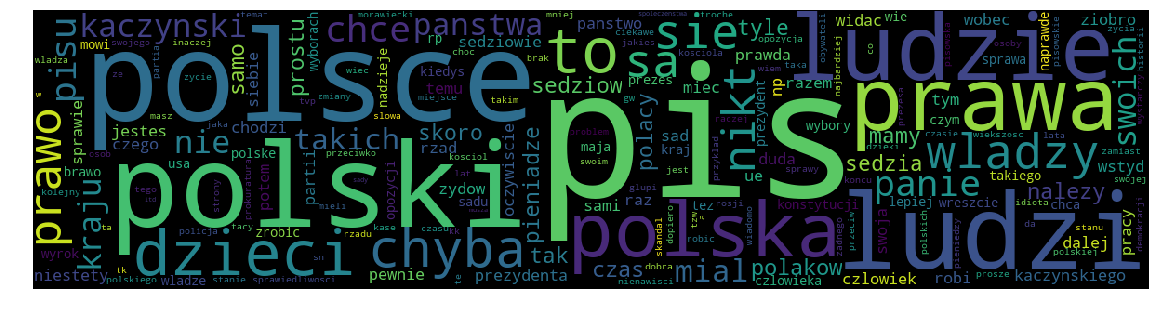

In [23]:
word_could_dict = Counter(to_cloud["susp"])
wordcloud = WordCloud(width = 1200, height = 300).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1199.5, 299.5, -0.5)

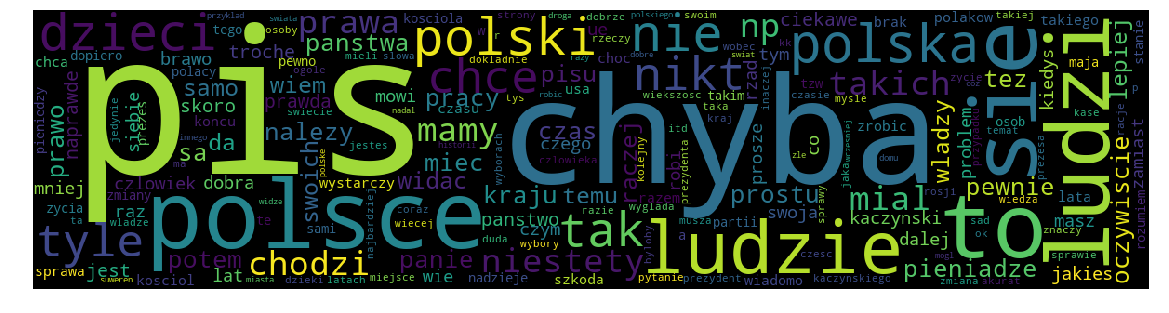

In [24]:
word_could_dict=Counter(to_cloud["rest"])
wordcloud = WordCloud(width = 1200, height = 300).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")

## Perform basic data mining

In [25]:
import pandas as pd

In [26]:
df = pd.DataFrame(comments).drop('words', axis = 1).astype(int, errors = 'ignore')

In [27]:
len(df)

495204

In [28]:
df.head(3)

,author,date,downvotes,id,length,replies,susp,type,upvotes,url
0,ZS54,"05.07.2018, 09:24",0,100663009,448,0,0,main,10,"http://wyborcza.biz/biznes/7,147880,23632593,n..."
1,jaCzlowiek,"18.09.2018, 09:46",0,100856066,80,0,0,main,1,"http://wyborcza.biz/biznes/7,147880,23632593,n..."
2,bwn104,"14.05.2018, 17:00",4,100545330,2280,3,0,main,0,"http://wyborcza.pl/7,75399,23398351,katalonia-..."


In [29]:
df[['susp', 'date']].groupby('susp').count()

,date
susp,
0,444630
1,50574


In [30]:
df[['susp', 'length']]\
    .groupby('susp')\
    .mean()

,length
susp,
0,161.626031
1,188.667280


In [31]:
df['upvotes'] = df['upvotes'].astype(int)

df[['susp', 'upvotes']]\
    .groupby('susp')\
    .mean()

,upvotes
susp,
0,14.305348
1,15.797010


In [32]:
df['downvotes'] = df['downvotes'].astype(int)

df[['susp', 'downvotes']]\
    .groupby('susp')\
    .mean()

,downvotes
susp,
0,1.456157
1,1.472140


In [33]:
df[['susp', 'replies']]\
    .groupby('susp')\
    .mean()

,replies
susp,
0,1.267517
1,1.341480


In [34]:
tmp = df[['susp', 'type', 'date']]\
    .groupby(['susp', 'type'])\
    .count()\
    .reset_index()\
    .pivot('susp', 'type', 'date')
tmp['perc'] = round(tmp['main'] / (tmp['main'] + tmp['sub']), 2)
print(tmp)

type    main     sub  perc
susp                      
0     270404  174226  0.61
1      32120   18454  0.64
